# The Mathematics of Logistic Regression

_Author: Callum Hall_

_Date: 11/08/2025_

## Chapter 1: The Core Idea

### 1.1 Overview

This notebook is looking at the mathematics and theory that underpins logistic regression models. Logistic regression models are an algorithm that is used in classification problems. A traditional linear equation will not work in a classification problem because a linear regression model will provide an output that ranges from negative to positive infinity whereas a probability needs to be between 0-1. Therefore to do this, we have to apply a sigmoid transformation in order to ensure an output that will allow for probability problems.

### 1.2 The General Equation

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

The sigmoid function is what changes a simple linear regression function into a logistic regression function that outputs in a 0-1 format rather than a negative infinity - postitive infinity scale.

The way the sigmoid function works is in the $e^{-z}$ which dictates whether the overall function is a very small number or very large number.

The model works in two stages to produce a final probability.

**1. The Linear Part**

First, the model calculates a linear score, which we call $z$. This score can be any real number.

$$z = Wx + b$$

**2. The Sigmoid Part**

Next, this linear score $z$ is passed as the input to the sigmoid function. This "squashes" the result into a probability between 0 and 1.

$$P(x) = \sigma(z) = \frac{1}{1 + e^{-z}}$$

**The Final Equation**
By combining these two stages, we get the final, full equation for logistic regression:

$$P(x) = \frac{1}{1 + e^{-(Wx+b)}}$$

This final equation gives us the probability of a data point belonging to the positive class.

## Chapter 2: Log Odds

Log odds are the direct mathematical link between the linear part of the model and the probability. To understand this, we need to understand the odds and how they are calculated.

**Odds**

The odds of an event is the ratio probability of the event happening and the probability of the event not happening.

$$\text{Odds} = \frac{P(x)}{1-P(x)}$$

So, for example, if there is a 60% chance of a stock price rising ($P=0.6$) then

 $$\text{Odds} = \frac{0.6}{1-0.6}$$

This means that the stock is 1.5x more likely to rise than fall.

**Log Odds**

The log odds are simply taking the natural logarithm of theses odds. This is the crucial part of the process. To understand why this is so important, we need to understand that taking the log of the odds equals the linear equation discussed previously.

$$\log\left(\frac{P(x)}{1-P(x)}\right) = Wx + b$$

This key part of the formulas allows us to use a simple linear equation and apply it to a more complex, non-linear probability by applying the sigmoid transform to it. The models job is not to directly predict the probability but to find the best $W$ and $b$ values that accuratly predict the best log odds of the outcome.

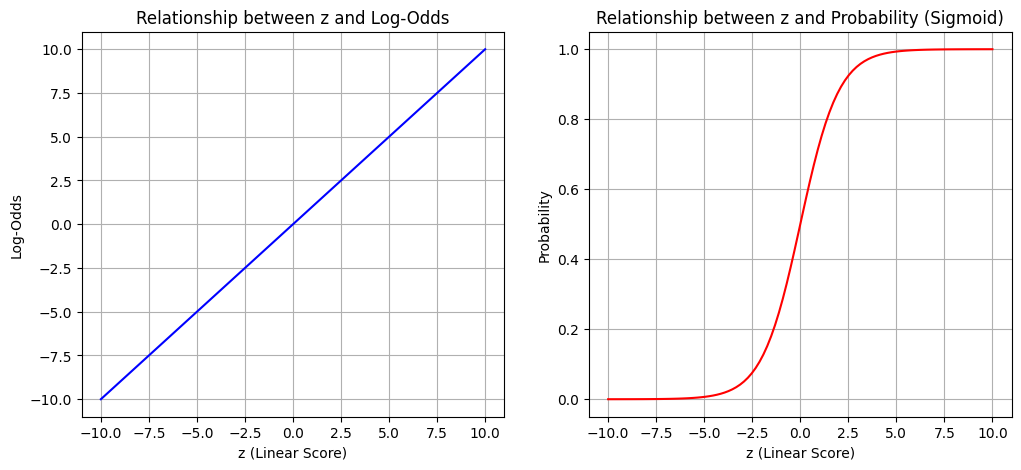

**The end to end pipeline**

This is the entire process from start to finish.

1. The model takes the features $(X)$ as the input.
2. It calculates the linear score $(z)$ by using the learned parameters $W$ and $b$. This $z$ is the log odds

$$ z = Wx + b$$

3. The log odds ($z$) is then passed through the sigmoid function which then returns the probability, $P(x)$ on a scale of 0-1

$$P(x) = \frac{1}{1 + e^{-z}}$$


## Chapter 3: The Loss Function

### 3.1 The Overview

Cross entropy loss is the loss function used for logistic regression models. The loss function aims to solve the fundamental issue that exists when trying to apply MSE to a probability equation. When using MSE, the value exists between 0-1, meaning that penalising high confidence, incorrect answers can only achieve a loss score of 1. Cross entropy loss allows for infinite loss, meaning punishment of the model is much greater, leading to better training during the optimisation phase.

$$L = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) \right]$$

The way the formula works is that the log is the driving force behind this. The log works by amplifying the penalty. For instance, if a true label = $1$ and the model predicts $1$, giving $\log(1) = 0$. 0 loss is not penalty for a correct answer. If the model predicts a number close to 0, therefore $\log(p)$ approaches negative infinity. To understand why, we need to understand that the function of a logarithm is to find the exponent but when applied to a number between 0 and 1, this allows for infinitly bigger values. $\log(1) = 0$, $\log(0.1) = -2.3$, $\log(0.01) = -4.6$ etc. The minus at the beginning of the formula ensures that the loss is always a non-negative number.

### 3.2 Worked Example

There is a dataset with data points

* $y_i$: The true value
* $\hat{y}$: The models predicted probability (a number between 0 - 1)

There are 3 different data points to calculate.

* $y_i$ = 1, $\hat{y}$ = 0.9, **Correct** and confident
* $y_i$ = 1, $\hat{y}$ = 0.1, **Incorrect** and confident
* $y_i$ = 0, $\hat{y}$ = 0.4, **Correct** and unsure

**Data Point 1**

$$L = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) \right]$$

Since $y_{1}$ = 1, therefore $(1-y_{1}) = 0$ so the second part of the formula is set to 0.

\begin{align*}
L_1 &= -[y_{1} \log(\hat{y}_1) + (1-y_1) \log(1-\hat{y}_1)] \\
L_1 &= -[1 \log(0.9) + (1-1) \log(1-0.9)] \\
L_1 &= -[\log(0.9)] \\
L_1 &= -[-0.105] = 0.105
\end{align*}

**Data Point 2**

\begin{align*}
L_2 &= -[y_2 \log(\hat{y}_2) + (1-y_2) \log(1-\hat{y}_2)] \\
L_2 &= -[1 \log(0.1) + (1-1) \log(1-0.1)] \\
L_2 &= -[\log(0.1)] \\
L_2 &= -[-2.30] = 2.30
\end{align*}

**Data Point 3**

\begin{align*}
L_3 &= -[y_3 \log(\hat{y}_3) + (1-y_3) \log(1-\hat{y}_3)] \\
L_3 &= -[0 \log(0.4) + (1-0) \log(1-0.4)] \\
L_3 &= -[\log(0.6)] \\
L_3 &= -[-0.51] = 0.51
\end{align*}

The final step is to then take the sumation and average it. In the formula, the $-\frac{1}{n} \sum_{i=1}^{n}$ component instructs us to perform the calculation for each data point $i$, sum up the results, and then take the average.

$$L_{avg} = (0.105 + 2.30 + 0.51)/3=0.97$$

## Chapter 4: Optimisation

Optimisation works much the same as the linear model here using gradient decent. Therefore please refer to linear regression notebook for a more detailed explaination.